In [11]:
import os
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
import numpy as np

# Path to the directory containing your CSV files
ID_datsets = ['cifar10OOD'] #, 'cifar100OOD', 'VisdaOOD', 'ImagenetROOD']
OOD_datasets = ['MNIST', 'SVHN', 'cifar10', 'cifar100', 'Tiny']

In [12]:
for id_data in ID_datsets:
    df_all = []
    for ood_data in OOD_datasets:
        log_dir = f'/home/manogna/TTA/clip-owtta/logs/clip/{id_data}/{ood_data}'
        if os.path.exists(log_dir):
            combined_df = []
            for method in ['zsclip', 'rosita_v10_pl', 'rosita_v12_simclr', 'rosita_v10']:
                if method in ['zsclip', 'promptalign_aug']:    
                    file_path = f'{log_dir}/{method}_txt/result_metrics/maxlogit.csv'
                else:      
                    file_path = f'{log_dir}/{method}_txt/result_metrics/maxlogit_plthresh07.csv'  
                if not os.path.exists(file_path): continue
                df = pd.read_csv(file_path)
                
                # Append the DataFrame to the combined DataFrame
                combined_df.append(df)
            combined_df = pd.concat(combined_df, ignore_index=True)
            print(f'\n\nID dataset:{id_data}, OOD dataset:{ood_data}')
            print(combined_df)
            df_all.append(combined_df)



ID dataset:cifar10OOD, OOD dataset:MNIST
                  Method         OOD Detector       AUC     FPR95  ACC_ALL  \
0             zsclip_txt             maxlogit  0.910614  0.886456   0.7385   
1      rosita_v10_pl_txt  maxlogit_plthresh07  0.924791  0.599500   0.7651   
2  rosita_v12_simclr_txt  maxlogit_plthresh07  0.978876  0.170500   0.7347   
3         rosita_v10_txt  maxlogit_plthresh07  0.981457  0.149600   0.7445   

   ACC_ID  ACC_OOD    ACC_HM  
0  0.6082   0.9972  0.755571  
1  0.6458   0.9851  0.780155  
2  0.6854   0.9963  0.812112  
3  0.7056   0.9952  0.825744  


ID dataset:cifar10OOD, OOD dataset:SVHN
                  Method         OOD Detector       AUC     FPR95  ACC_ALL  \
0             zsclip_txt             maxlogit  0.903493  0.624567   0.7385   
1      rosita_v10_pl_txt  maxlogit_plthresh07  0.909022  0.552400   0.7659   
2  rosita_v12_simclr_txt  maxlogit_plthresh07  0.936643  0.371500   0.7242   
3         rosita_v10_txt  maxlogit_plthresh07  0.953480  

0               zsclip_txt
1        rosita_v10_pl_txt
2    rosita_v12_simclr_txt
3           rosita_v10_txt
Name: Method, dtype: object


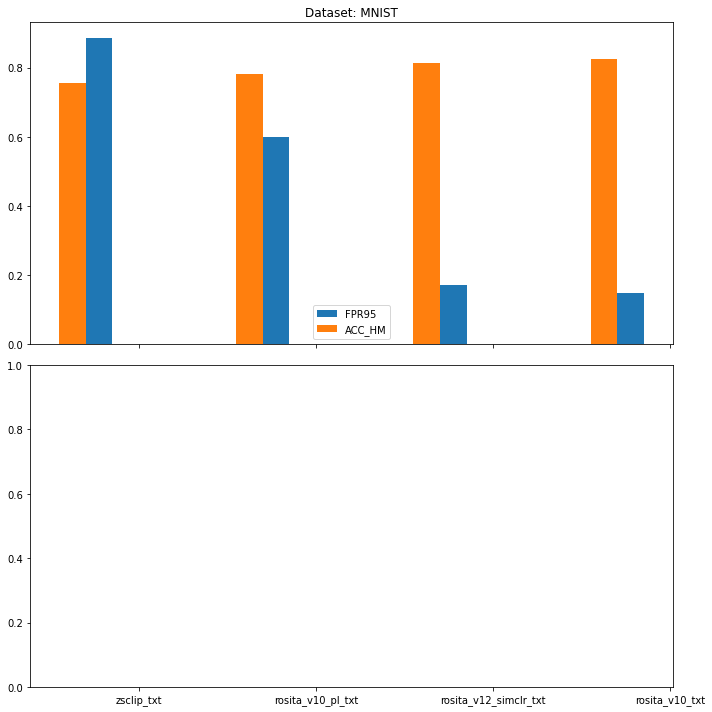

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

datasets = ['MNIST', 'SVHN']

for i, df in enumerate(df_all[:1]):
    methods = df['Method']
    auc = df['AUC']
    fpr95 = df['FPR95']
    acc_all = df['ACC_ALL']
    acc_id = df['ACC_ID']
    acc_ood = df['ACC_OOD']
    acc_hm = df['ACC_HM']

    bar_width = 0.15
    index = np.arange(len(methods))

    # ax[i].bar(index, auc, bar_width, label='AUC')
    ax[i].bar(index + bar_width, fpr95, bar_width, label='FPR95')
    # ax[i].bar(index + 2 * bar_width, acc_all, bar_width, label='ACC_ALL')
    # ax[i].bar(index + 3 * bar_width, acc_id, bar_width, label='ACC_ID')
    # ax[i].bar(index + 4 * bar_width, acc_ood, bar_width, label='ACC_OOD')
    ax[i].bar(index+i*bar_width, acc_hm, bar_width, label='ACC_HM')
    print(methods)

    ax[i].set_xticks(index + 2.5 * bar_width)
    ax[i].set_xticklabels(methods, rotation=45, ha='right')
    ax[i].set_title(f'Dataset: {datasets[i]}')
    ax[i].legend()

plt.tight_layout()
plt.show()

<BarContainer object of 4 artists>

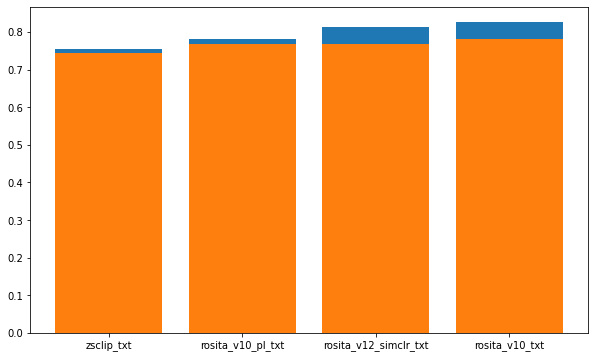

In [21]:
plt.figure(figsize=(10, 6))

plt.bar(df_all[0]['Method'], df_all[0]['ACC_HM'], label='ImagenetROOD')
plt.bar(df_all[1]['Method'], df_all[1]['ACC_HM'], label='ImagenetROOD')


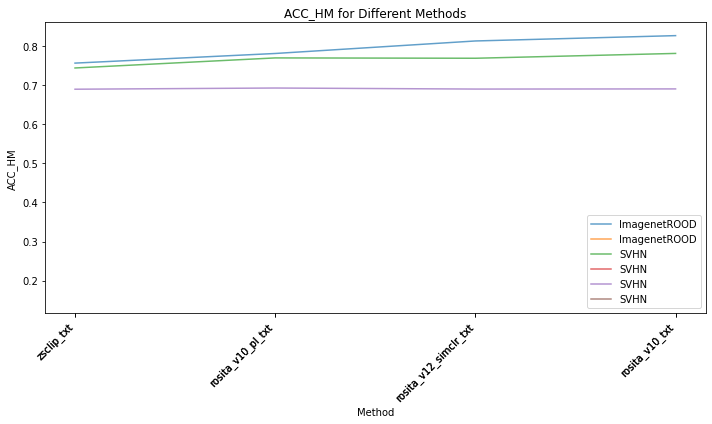

In [13]:
df_imagenet = pd.DataFrame(df_all[0])
df_svhn = pd.DataFrame(df_all[1])

# Plotting
plt.figure(figsize=(10, 6))

# Set custom x-axis tick positions
x_ticks_imagenet = np.arange(len(df_imagenet['Method']))
x_ticks_svhn = np.arange(len(df_svhn['Method']))

# Plot bars for each dataset
bar_width = 0.15

plt.plot(x_ticks_imagenet, df_imagenet['ACC_HM'], bar_width, label='ImagenetROOD', alpha=0.7)
plt.plot(x_ticks_svhn, df_svhn['ACC_HM'], bar_width,label='SVHN', alpha=0.7)
plt.plot(x_ticks_svhn, df_all[2]['ACC_HM'], bar_width,label='SVHN', alpha=0.7)

# Set x-axis tick positions and labels
plt.xticks(np.concatenate((x_ticks_imagenet, x_ticks_svhn)), np.concatenate((df_imagenet['Method'], df_svhn['Method'])), rotation=45, ha='right')

plt.xlabel('Method')
plt.ylabel('ACC_HM')
plt.title('ACC_HM for Different Methods')
plt.legend()
plt.tight_layout()

plt.show()